In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

import torch
import torch.nn as nn

In [2]:
# 0. prepare data

x_np, y_np = datasets.make_regression(n_samples=100,
                                      n_features=1, 
                                      noise=20, random_state=1)

x = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

x.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [3]:
# 1. build model
input_size, output_size = n_features, 1
model = nn.Linear(in_features=input_size, out_features=output_size)

model

Linear(in_features=1, out_features=1, bias=True)

In [4]:
# 2. loss & optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
# 3. training loop
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass & loss
    y_pred = model(x)
    loss = criterion(y_pred, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'[epoch {epoch+1:2d}] loss : {loss.item():.4f}')

[epoch 10] loss : 4475.0767
[epoch 20] loss : 3335.5713
[epoch 30] loss : 2511.5332
[epoch 40] loss : 1914.9675
[epoch 50] loss : 1482.6375
[epoch 60] loss : 1169.0316
[epoch 70] loss : 941.3466
[epoch 80] loss : 775.9079
[epoch 90] loss : 655.6091
[epoch 100] loss : 568.0740


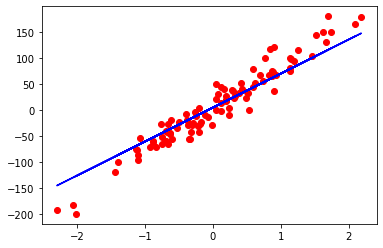

In [6]:
# plot
predicted = model(x).detach().numpy()
plt.plot(x_np, y_np, 'ro')
plt.plot(x_np, predicted, 'b')
plt.show()